# Assignment :- 1

In [9]:
import requests
from bs4 import BeautifulSoup

def get_news_articles(company_name):
    # Create a URL for a news website that provides articles about the given company
    url = f"https://www.example-news-website.com/search?q={company_name}"

    try:
        # Send a GET request to the URL
        response = requests.get(url)

        # Check if the request was successful (status code 200)
        if response.status_code == 200:
            # Parse the HTML content of the page using Beautiful Soup
            soup = BeautifulSoup(response.text, 'html.parser')

            # Find the elements that contain news article links
            article_links = soup.find_all('a', class_='news-article-link')

            # Extract and print the headlines and links to the articles
            for link in article_links:
                headline = link.text
                article_url = link['href']
                print(f"Headline: {headline}")
                print(f"Article URL: {article_url}")
                print("\n")

        else:
            print("Failed to retrieve data. Status code:", response.status_code)

    except Exception as e:
        print("An error occurred:", str(e))

# Example usage:
company_name = "Apple"
get_news_articles(company_name)


An error occurred: HTTPSConnectionPool(host='www.example-news-website.com', port=443): Max retries exceeded with url: /search?q=Apple (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x0000019861B7CD00>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))


In [4]:
pip install yfinance


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
  Created wheel for peewee: filename=peewee-3.16.3-py3-none-any.whl size=135547 sha256=d75c80e7e90bb4da32fda75f27d80e980d840c451a8b89b19a358b5f8a2bd3a6
  Stored in directory: c:\users\salman_mohamm3d\appdata\local\pip\cache\wheels\46\c8\76\da8e4e28595d45fac70db742390350ab43211d5ae4b0eb376c
Successfully built peewee
  Attempting uninstall: pytz
    Found existing installation: pytz 2021.3
    Uninstalling pytz-2021.3:
      Successfully uninstalled pytz-2021.3
  Attempting uninstall: requests
    Found existing installation: requests 2.27.1
    Uninstalling requests-2.27.1:
      Successfully uninstalled requests-2.27.1
  Att

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
anaconda-project 0.10.2 requires ruamel-yaml, which is not installed.


In [7]:
pip install yahoo_fin

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install mplfinance

Note: you may need to restart the kernel to use updated packages.


# Retrieving the Financial Article of the five selected companies 

## Making Api Calls(yahoo finance python library)

In [10]:
import yfinance as yf

In [11]:
# Import the library


# Choose a ticker symbol
ticker = "AMZN"

# Get the ticker object
stock = yf.Ticker(ticker)

# Get the news articles for the ticker
news = stock.news

# Print the titles and links of the articles
for article in news:
    print(article["title"])
    print(article["link"])
    print()

Whole Foods is making a major change to one of its most beloved products
https://finance.yahoo.com/m/9a9e6779-a489-3579-8f81-24058cea96ab/whole-foods-is-making-a-major.html

Amazon Space Launch a Success. It’s Still Way Behind SpaceX.
https://finance.yahoo.com/m/a2b52886-b020-3763-99b4-a10da687702f/amazon-space-launch-a.html

Amazon Launches First Satellites in Bid to Challenge SpaceX’s Starlink
https://finance.yahoo.com/m/81a43cd3-fe6c-3165-840b-ef97ecc4e97b/amazon-launches-first.html

How I Plan to Save $100 on Halloween This Year
https://finance.yahoo.com/m/4b85ddd0-a03a-3b74-88ea-2e95615c26eb/how-i-plan-to-save-%24100-on.html

Netflix: 'High probability' streamer will raise prices, analyst says
https://finance.yahoo.com/video/netflix-high-probability-streamer-raise-162537743.html

Amazon leaked documents show an exciting change is on the way
https://finance.yahoo.com/m/985792c1-d6ad-322a-88f5-10343f79da33/amazon-leaked-documents-show.html

2 Stock-Split Artificial Intelligence (AI)

In [56]:
# Import the library
import yfinance as yf

# Choose a ticker symbol
ticker = "WIT"

# Specify the date for which you want to retrieve news articles (YYYY-MM-DD format)
target_date = "2020-11-01"

# Get the ticker object
stock = yf.Ticker(ticker)

# Get the news articles for the ticker and the specified date
news = stock.history(period="1d", start=target_date, end=target_date)

# Print the titles and links of the articles
for idx, row in news.iterrows():
    print(f"Date: {idx.strftime('%Y-%m-%d')}")
    print(f"Title: {row['Headline']}")
    print(f"Link: {row['URL']}")
    print()


WIT: No price data found, symbol may be delisted (1d 2020-11-01 -> 2020-11-01)


## Using Web Scrapping

In [58]:

import requests
from bs4 import BeautifulSoup

def scrape_news_articles(company_name, target_date):
    # Define the URL for Yahoo Finance news related to the company and the target date
    url = f"https://finance.yahoo.com/quote/{company_name}?p={company_name}&.tsrc=fin-srch&date={target_date}"

    try:
        # Send an HTTP GET request to the URL
        response = requests.get(url)

        # Check if the request was successful (status code 200)
        if response.status_code == 200:
            # Parse the HTML content of the page using Beautiful Soup
            soup = BeautifulSoup(response.text, 'html.parser')

            # Find the elements that contain news article links
            article_links = soup.find_all('h3', class_='Mb(5px)')

            # Extract and print the headlines and links to the articles
            for link in article_links:
                headline = link.text
                article_url = link.find('a')['href']
                print(f"Headline: {headline}")
                print(f"Article URL: {article_url}")
                print("\n")

        else:
            print("Failed to retrieve data. Status code:", response.status_code)

    except Exception as e:
        print("An error occurred:", str(e))

# Example usage:
company_name = "WIT"      # Ticker symbol for Apple Inc.
target_date = "2018-10-01"# Specify the target date (YYYY-MM-DD format)
scrape_news_articles(company_name, target_date)


Failed to retrieve data. Status code: 404


## Web Scraping From Reuters.com

In [59]:
#changes source from yahoo finance to reuters.com
import requests
from bs4 import BeautifulSoup

def scrape_news_articles(company_name, target_date):
    try:
        # Define the URL for Reuters news search results
        url = f"https://www.reuters.com/search/news?blob={company_name}&sortBy=date&dateRange={target_date}"

        # Send an HTTP GET request to the Reuters URL
        response = requests.get(url)

        # Check if the request was successful (status code 200)
        if response.status_code == 200:
            # Parse the HTML content of the page using Beautiful Soup
            soup = BeautifulSoup(response.text, 'html.parser')

            # Find the elements that contain news article links
            article_links = soup.find_all('div', class_='search-result-content')

            # Extract and print the headlines and links to the articles
            for link in article_links:
                headline = link.find('h3').text.strip()
                article_url = link.find('a')['href']
                print(f"Headline: {headline}")
                print(f"Article URL: {article_url}")
                print("\n")

        else:
            print("Failed to retrieve data. Status code:", response.status_code)

    except Exception as e:
        print("An error occurred:", str(e))

# Example usage:
company_name = "Wipro"     # Replace with the desired company name or keyword
target_date = "2018-10-01"   # Specify the target date (YYYY-MM-DD format)
scrape_news_articles(company_name, target_date)


Headline: Indian IT firms set for "washout" year, focus now on 2025 - J.P.Morgan
Article URL: /article/idUSKBN3150TX


Headline: Indian IT firms set for "washout" year, focus now on 2025 - J.P.Morgan
Article URL: /article/idUSL4N3BB16W


Headline: Cognizant appoints former Wipro finance chief Jatin Dalal as CFO
Article URL: /article/idUSKBN30Y16B


Headline: UPDATE 1-Cognizant appoints former Wipro finance chief Jatin Dalal as CFO
Article URL: /article/idUSL4N3B436C


Headline: Cognizant appoints former Wipro finance chief Jatin Dalal as CFO
Article URL: /article/idUSL4N3B433K


Headline: INDIA STOCKS-Indian shares extend losses as global risk appetite wavers
Article URL: /article/idUSL4N3AY124


Headline: INDIA STOCKS-Indian shares set for subdued open as Fed angst weighs
Article URL: /article/idUSL4N3AY0LJ


Headline: India's Wipro says CFO Dalal resigns, replaced by 20-yr veteran Iyer
Article URL: /article/idUSKBN30R0VJ


Headline: UPDATE 2-India's Wipro says CFO Dalal resigns, repl

## Sentiment Analysis 



In [36]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# Download the NLTK data for sentiment analysis 
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\salman_mohamm3d\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

### Code to perform the sentiment analysis on any text :- 

In [37]:
# Create a SentimentIntensityAnalyzer object
analyzer = SentimentIntensityAnalyzer()

# Sample article text (replace with your article text)
article_text = """
This is a sample article text. It may contain positive and negative sentiments.
The stock market is performing well, which is a positive sign for investors.
However, there are concerns about the economic outlook, which is causing some worry.
"""

# Analyze the sentiment of the article
sentiment_scores = analyzer.polarity_scores(article_text)

# Interpret the sentiment scores
compound_score = sentiment_scores['compound']

if compound_score >= 0.05:
    sentiment = "Positive"
elif compound_score <= -0.05:
    sentiment = "Negative"
else:
    sentiment = "Neutral"

# Print the sentiment and sentiment scores
print(f"Sentiment: {sentiment}")
print(f"Compound Score: {compound_score}")
print(f"Positive Score: {sentiment_scores['pos']}")
print(f"Negative Score: {sentiment_scores['neg']}")
print(f"Neutral Score: {sentiment_scores['neu']}")


Sentiment: Positive
Compound Score: 0.4019
Positive Score: 0.194
Negative Score: 0.138
Neutral Score: 0.668


### Providing the article directly to Vader Lexicon to get the sentiment scores 

### Code to perform the sentiment analysis on any URL :- 

In [41]:
import requests
from bs4 import BeautifulSoup
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download the NLTK data for sentiment analysis (if not already downloaded)
nltk.download('vader_lexicon')

# Create a SentimentIntensityAnalyzer object
analyzer = SentimentIntensityAnalyzer()

# Specify the URL of the article you want to analyze
article_url = "https://www.reuters.com/article/idUSL4N3AX2OS"  # URL of the article

try:
    # Send an HTTP GET request to fetch the article content
    response = requests.get(article_url)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Parse the HTML content of the page using Beautiful Soup
        soup = BeautifulSoup(response.text, 'html.parser')

        # Extract the article text (customize this based on the website's structure)
        article_text = ""

        # Assuming the article content is within paragraph tags, extract and concatenate the text
        paragraphs = soup.find_all('p')
        for paragraph in paragraphs:
            article_text += paragraph.get_text() + "\n"

        # Analyze the sentiment of the article
        sentiment_scores = analyzer.polarity_scores(article_text)

        # Interpret the sentiment scores
        compound_score = sentiment_scores['compound']

        if compound_score >= 0.05:
            sentiment = "Positive"
        elif compound_score <= -0.05:
            sentiment = "Negative"
        else:
            sentiment = "Neutral"

        # Print the sentiment and sentiment scores
        print(f"Sentiment: {sentiment}")
        print(f"Compound Score: {compound_score}")
        print(f"Positive Score: {sentiment_scores['pos']}")
        print(f"Negative Score: {sentiment_scores['neg']}")
        print(f"Neutral Score: {sentiment_scores['neu']}")

    else:
        print("Failed to retrieve data. Status code:", response.status_code)

except Exception as e:
    print("An error occurred:", str(e))


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\salman_mohamm3d\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Sentiment: Positive
Compound Score: 0.8826
Positive Score: 0.063
Negative Score: 0.049
Neutral Score: 0.887


In [42]:
#decreasing the threshold values of positive and negative sentiments in the code  
import requests
from bs4 import BeautifulSoup
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download the NLTK data for sentiment analysis (if not already downloaded)
nltk.download('vader_lexicon')

# Create a SentimentIntensityAnalyzer object
analyzer = SentimentIntensityAnalyzer()

# Specify the URL of the article you want to analyze
article_url = "https://www.reuters.com/article/idUSL4N3AX2OS"  # URL of the article

try:
    # Send an HTTP GET request to fetch the article content
    response = requests.get(article_url)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Parse the HTML content of the page using Beautiful Soup
        soup = BeautifulSoup(response.text, 'html.parser')

        # Extract the article text (customize this based on the website's structure)
        article_text = ""

        # Assuming the article content is within paragraph tags, extract and concatenate the text
        paragraphs = soup.find_all('p')
        for paragraph in paragraphs:
            article_text += paragraph.get_text() + "\n"

        # Analyze the sentiment of the article
        sentiment_scores = analyzer.polarity_scores(article_text)

        # Interpret the sentiment scores
        compound_score = sentiment_scores['compound']

        if compound_score >= 0.01:
            sentiment = "Positive"
        elif compound_score <= -0.01:
            sentiment = "Negative"
        else:
            sentiment = "Neutral"

        # Print the sentiment and sentiment scores
        print(f"Sentiment: {sentiment}")
        print(f"Compound Score: {compound_score}")
        print(f"Positive Score: {sentiment_scores['pos']}")
        print(f"Negative Score: {sentiment_scores['neg']}")
        print(f"Neutral Score: {sentiment_scores['neu']}")

    else:
        print("Failed to retrieve data. Status code:", response.status_code)

except Exception as e:
    print("An error occurred:", str(e))

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\salman_mohamm3d\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Sentiment: Positive
Compound Score: 0.8826
Positive Score: 0.063
Negative Score: 0.049
Neutral Score: 0.887


### Tasneems Code : - 

In [44]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import requests

# Download NLTK data for stopwords
nltk.download('stopwords')

# Download NLTK data for wordnet
nltk.download('wordnet')

# Download NLTK data for punkt
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\salman_mohamm3d\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\salman_mohamm3d\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\salman_mohamm3d\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
### Providing the Preprocessed data of the article to Vader Lexicon to get the sentiment scores 

In [45]:



# Specify the URL from which you want to fetch the text
url = "https://www.reuters.com/article/idUSL4N3AX2OS"  # Replace with the actual URL

# Send an HTTP GET request to fetch the article content
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Extract the text content from the response
    data = response.text

    # Define a function to preprocess the text
    def clean_text(data):
        # Convert the text to lowercase
        data = data.lower()

        # Tokenize the text into words
        tokens = word_tokenize(data)

        # Remove stopwords from the text
        filtered_words = [token for token in tokens if token not in stopwords.words('english')]

        # Lemmatize the tokens
        lemmatizer = WordNetLemmatizer()
        lemmatized_words = [lemmatizer.lemmatize(token) for token in filtered_words]

        # Join the separated tokens/words back into a string
        preprocessed_text = ' '.join(lemmatized_words)
        return preprocessed_text

    # Call the clean_text function to preprocess the text
    result = clean_text(data)

    # Print the preprocessed text
    print(result)

else:
    print("Failed to retrieve data. Status code:", response.status_code)


< ! doctype html > < html lang= '' en '' > < head > < title > india & # x27 ; wipro say cfo dalal resigns , replaced 20-year veteran iyer | reuters < /title > < meta name= '' render_timestamp '' content= '' 2023-10-06t20:33:31.408z '' / > < meta name= '' viewport '' content= '' width=device-width , initial-scale=1 '' / > < meta name= '' apple-itunes-app '' content= '' app-id=602660809 , app-argument=https : //www.reuters.com/technology/indias-wipro-cfo-dalal-resigns-2023-09-21/ ? id=hterk2oi6bpynnxbvnir4pdfs4 '' / > < script > ( function ( ) { var current_location = window.location.href ; ( current_location.indexof ( '/info-pages/supported-browsers/ ' ) === -1 ) { var supportfetchapi = 'fetch ' window ; var supportcssgrid = window.css & & css.supports ( 'display ' , 'grid ' ) ; ( ! supportfetchapi & & ! supportcssgrid ) { window.location.href = '/info-pages/supported-browsers/ ' ; } } } ) ( ) < /script > < script src= '' /pf/resources/dist/reuters/js/index.js ? d=159 '' async= '' '' da

In [104]:
# Initializing the VADER sentiment model
sia = SentimentIntensityAnalyzer()

# Get the sentiment scores
sentiment_scores = sia.polarity_scores(result)
print(sentiment_scores)




{'neg': 0.005, 'neu': 0.967, 'pos': 0.028, 'compound': 1.0}


### Extracting the open, high, low, close & volume values of the specific data

In [50]:
from yahoo_fin.stock_info import get_data
import matplotlib.pyplot as plt
import pandas as pd


In [72]:
import yfinance as yf

# Ticker symbol for Wipro
ticker = "WIT"

# Specify the date range for which you want to retrieve data
start_date = "2018-09-26"
end_date = "2018-10-02"

# Create a Ticker object
stock = yf.Ticker(ticker)

# Get historical data for the specified date range with a weekly interval
wipro_weekly = stock.history(period="1wk", start=start_date, end=end_date)

# Reset the index of the DataFrame
wipro_weekly.reset_index(inplace=True)

# Rename the index column of the DataFrame to 'timestamp'
wipro_weekly.rename(columns={'Date': 'timestamp'}, inplace=True)

# Print the DataFrame
print(wipro_weekly)


                  timestamp      Open      High       Low     Close   Volume  \
0 2018-09-26 00:00:00-04:00  5.092470  5.229575  5.092470  5.170816  1620200   
1 2018-09-27 00:00:00-04:00  5.112057  5.170817  5.082678  5.102264  1106700   
2 2018-09-28 00:00:00-04:00  5.141437  5.151230  5.072884  5.102264   554100   
3 2018-10-01 00:00:00-04:00  5.170816  5.170816  5.102263  5.131643   938200   
4 2018-10-02 00:00:00-04:00  5.141437  5.141437  5.072885  5.092471   544300   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [78]:
# Specify the target date for which you want to calculate the stock price change
target_date = "2018-10-01"

# Filter the DataFrame to get data for the target date
target_date_data = wipro_weekly[wipro_weekly['timestamp'] == target_date]

# Check if data is available for the target date
if not target_date_data.empty:
    # Get the closing price on the target date
    closing_price_target_date = target_date_data['Close'].values[0]

    # Calculate the stock price change (closing price on the target date - closing price on the previous trading day)
    previous_trading_day_data = wipro_weekly[wipro_weekly['timestamp'] < target_date].tail(1)
    closing_price_previous_day = previous_trading_day_data['Close'].values[0]

    stock_price_change = closing_price_target_date - closing_price_previous_day

    # Print the stock price change
    print(f"Stock Price Change on {target_date}: {stock_price_change:.2f}")
else:
    print(f"No data available for {target_date}.")


Stock Price Change on 2018-10-01: 0.03


In [97]:
import pandas as pd

# Sample list of target dates
target_dates = ["2018-09-27","2018-09-28","2018-10-01", "2018-10-02" ]
# Add more target dates as needed

# Initialize an empty DataFrame to store the results
result_df = pd.DataFrame(columns=["Target Date", "Stock Price Change"])

# Loop through the target dates
for target_date in target_dates:
    # Filter the DataFrame to get data for the target date
    target_date_data = wipro_weekly[wipro_weekly['timestamp'] == target_date]

    # Check if data is available for the target date
    if not target_date_data.empty:
        # Get the closing price on the target date
        closing_price_target_date = target_date_data['Close'].values[0]

        # Calculate the stock price change (closing price on the target date - closing price on the previous trading day)
        previous_trading_day_data = wipro_weekly[wipro_weekly['timestamp'] < target_date].tail(1)
        closing_price_previous_day = previous_trading_day_data['Close'].values[0]

        stock_price_change = closing_price_target_date - closing_price_previous_day

        # Append the result to the DataFrame
        result_df = result_df.append({"Target Date": target_date, "Stock Price Change": stock_price_change}, ignore_index=True)
    else:
        print(f"No data available for {target_date}.")

# Print the final result DataFrame
print(result_df)


  Target Date Stock Price Change
0  2018-09-27          -0.068552
1  2018-09-28                0.0
2  2018-10-01           0.029379
3  2018-10-02          -0.039172


C:\Users\salman_mohamm3d\AppData\Local\Temp\ipykernel_14432\1251435945.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({"Target Date": target_date, "Stock Price Change": stock_price_change}, ignore_index=True)
C:\Users\salman_mohamm3d\AppData\Local\Temp\ipykernel_14432\1251435945.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({"Target Date": target_date, "Stock Price Change": stock_price_change}, ignore_index=True)
C:\Users\salman_mohamm3d\AppData\Local\Temp\ipykernel_14432\1251435945.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({"Target Date": target_date, "Stock Price Change": stock_price_change}, ignore_index=True)
C

In [101]:
# checking if the company has any article or not on reuters.com 
import requests
from bs4 import BeautifulSoup

def check_articles_for_company(company_name):
    try:
        # Define the URL for Reuters news search results with the company name as the search query
        url = f"https://www.reuters.com/search/news?blob={company_name}"

        # Send an HTTP GET request to the Reuters URL
        response = requests.get(url)

        # Check if the request was successful (status code 200)
        if response.status_code == 200:
            # Parse the HTML content of the page using Beautiful Soup
            soup = BeautifulSoup(response.text, 'html.parser')

            # Find the elements that contain news article links
            article_links = soup.find_all('div', class_='search-result-content')

            # Check if there are any search results or articles related to the company
            if article_links:
                # Articles were found, print a message
                print(f"News articles are available for {company_name}.")
            else:
                # No articles were found, print a message
                print(f"No news articles found for {company_name}.")

        else:
            print("Failed to retrieve data. Status code:", response.status_code)

    except Exception as e:
        print("An error occurred:", str(e))

# Example usage:
company_name = "MSI"  # Replace with the desired company name or keyword
check_articles_for_company(company_name)


News articles are available for MSI.


In [107]:
# Searching the article based on a headline
import requests
from bs4 import BeautifulSoup

def get_specific_article(company_name, target_headline):
    try:
        # Define the URL for Reuters news search results with the company name as the search query
        url = f"https://www.reuters.com/search/news?blob={company_name}"

        # Send an HTTP GET request to the Reuters URL
        response = requests.get(url)

        # Check if the request was successful (status code 200)
        if response.status_code == 200:
            # Parse the HTML content of the page using Beautiful Soup
            soup = BeautifulSoup(response.text, 'html.parser')

            # Find the elements that contain news article links
            article_links = soup.find_all('div', class_='search-result-content')

            # Search for the specific article based on its headline
            for link in article_links:
                headline = link.find('h3').text.strip()
                if target_headline in headline:
                    # Article found, extract and print its details
                    article_url = link.find('a')['href']
                    print(f"Headline: {headline}")
                    print(f"Article URL: {article_url}")
                    break  # Exit the loop once the article is found

            # Check if the article was not found
            if "article_url" not in locals():
                print(f"No article found with the headline '{target_headline}'.")

        else:
            print("Failed to retrieve data. Status code:", response.status_code)

    except Exception as e:
        print("An error occurred:", str(e))

# Example usage:
company_name = "VNQ"  # Replace with the desired company name or keyword
target_headline = "Investor Pulse: Sentiment and hiring cool in April"  # Replace with the headline you want to find
get_specific_article(company_name, target_headline)


No article found with the headline 'Investor Pulse: Sentiment and hiring cool in April'.


In [103]:
import requests
from bs4 import BeautifulSoup

def search_and_get_article(company_name):
    try:
        # Define the URL for Reuters news search results with the company name as the search query
        url = f"https://www.reuters.com/search/news?blob={company_name}"

        # Send an HTTP GET request to the Reuters URL
        response = requests.get(url)

        # Check if the request was successful (status code 200)
        if response.status_code == 200:
            # Parse the HTML content of the page using Beautiful Soup
            soup = BeautifulSoup(response.text, 'html.parser')

            # Find the elements that contain news article links
            article_links = soup.find_all('div', class_='search-result-content')

            # Search for the first article and extract its details
            for link in article_links:
                headline = link.find('h3').text.strip()
                article_url = link.find('a')['href']
                print(f"Headline: {headline}")
                print(f"Article URL: {article_url}")
                return  # Exit the loop after finding the first article

            # Check if no articles were found
            print(f"No articles found for '{company_name}'.")

        else:
            print("Failed to retrieve data. Status code:", response.status_code)

    except Exception as e:
        print("An error occurred:", str(e))

# Example usage:
company_name = "MSI"  # Replace with the desired company name or keyword
search_and_get_article(company_name)


Headline: Bilibili Gaming, G2 advance to MSI bracket stage
Article URL: /article/idUSFLM5dL123


In [106]:
import requests
from bs4 import BeautifulSoup

# Specify the URL of the article you want to analyze
article_url = "https://www.reuters.com/article/idUSKBN2UK0N4"  # URL of the article

try:
    # Send an HTTP GET request to fetch the article content
    response = requests.get(article_url)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Parse the HTML content of the page using Beautiful Soup
        soup = BeautifulSoup(response.text, 'html.parser')

        # Find the element that contains the date information
        date_element = soup.find('div', class_='ArticleHeader_date')

        # Extract the date from the element
        article_date = date_element.text.strip() if date_element else "Date not found"

        # Print the extracted date
        print(f"Article Date: {article_date}")

    else:
        print("Failed to retrieve data. Status code:", response.status_code)

except Exception as e:
    print("An error occurred:", str(e))


Article Date: Date not found


In [108]:
# # Getting the sentiment at a time for more than one article
# import requests
# from bs4 import BeautifulSoup
# import nltk
# from nltk.sentiment.vader import SentimentIntensityAnalyzer

# # Download the NLTK data for sentiment analysis (if not already downloaded)
# nltk.download('vader_lexicon')

# # Create a SentimentIntensityAnalyzer object
# analyzer = SentimentIntensityAnalyzer()

# # List of article URLs
# article_urls = [
#     "https://www.reuters.com/article/idUSL4N3AX2OS",
#     "https://www.reuters.com/article/idUSKBN30R0VJ",
#     "https://www.reuters.com/article/idUSL4N3AX2P5",
#     "https://www.reuters.com/article/idUSL4N3B433K",
#     "https://www.reuters.com/article/idUSKBN30Y16B",
#     "https://www.reuters.com/article/idUSL4N3B436C",
#     "https://www.reuters.com/article/idUSL4N3BB16W",
#     "https://www.reuters.com/article/idUSKBN3150TX",
#     "https://www.reuters.com/article/idUSL4N3AY124",
#     "https://www.reuters.com/article/idUSL4N3AY0LJ"
# ]

# for article_url in article_urls:
#     try:
#         # Send an HTTP GET request to fetch the article content
#         response = requests.get(article_url)

#         # Check if the request was successful (status code 200)
#         if response.status_code == 200:
#             # Parse the HTML content of the article using BeautifulSoup
#             soup = BeautifulSoup(response.text, 'html.parser')

#             # Extract the article text (customize this based on the website's structure)
#             article_text = ""

#             # Assuming the article content is within paragraph tags, extract and concatenate the text
#             paragraphs = soup.find_all('p')
#             for paragraph in paragraphs:
#                 article_text += paragraph.get_text() + "\n"

#             # Analyze the sentiment of the article
#             sentiment_scores = analyzer.polarity_scores(article_text)
            
#             # Interpret the sentiment based on the compound score
#             compound_score = sentiment_scores['compound']
            
#             if compound_score >= 0.05:
#                 sentiment = "Positive"
#             elif compound_score <= -0.05:
#                 sentiment = "Negative"
#             else:
#                 sentiment = "Neutral"

#             # Print the sentiment and sentiment scores for the current article
#             print("Article URL:", article_url)
#             print(f"Sentiment: {sentiment}")
#             print(f"Compound Score: {compound_score:.4f}")
#             print(f"Positive Score: {sentiment_scores['pos']:.4f}")
#             print(f"Negative Score: {sentiment_scores['neg']:.4f}")
#             print(f"Neutral Score: {sentiment_scores['neu']:.4f}")
#             print()

#         else:
#             print("Failed to retrieve data. Status code:", response.status_code)

#     except Exception as e:
#         print("An error occurred:", str(e))


### Correlation 

In [90]:
import numpy as np

# Example sentiment scores and stock price changes (replace with your data)
sentiment_scores = [0.8826, -0.4321, 0.7234, -0.1234]
stock_price_changes = [0.03, 0.02, np.nan, -0.01]  # Replace with your stock price changes

# Convert lists to NumPy arrays
sentiment_scores = np.array(sentiment_scores)
stock_price_changes = np.array(stock_price_changes)

# Find indices where both arrays have valid values
valid_indices = np.logical_and(~np.isnan(sentiment_scores), ~np.isnan(stock_price_changes))

# Use only valid values for correlation calculation
sentiment_scores_valid = sentiment_scores[valid_indices]
stock_price_changes_valid = stock_price_changes[valid_indices]

# Calculate Pearson correlation for valid values
correlation = np.corrcoef(sentiment_scores_valid, stock_price_changes_valid)[0, 1]

# Print the correlation
print(f"Pearson Correlation: {correlation:.2f}")


Pearson Correlation: 0.51


In [92]:
import pandas as pd

# Assuming result_df and the sentiment analysis output are defined earlier in your code

# Create a DataFrame for the sentiment analysis output
sentiment_data = {
    'Sentiment': [sentiment],
    'Compound Score': [compound_score],
    'Positive Score': [sentiment_scores['pos']],
    'Negative Score': [sentiment_scores['neg']],
    'Neutral Score': [sentiment_scores['neu']]
}
sentiment_df = pd.DataFrame(sentiment_data)

# Concatenate the two DataFrames horizontally (along columns)
merged_df = pd.concat([result_df, sentiment_df], axis=1)

# Now, merged_df contains the combined data from both DataFrames
print(merged_df)


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

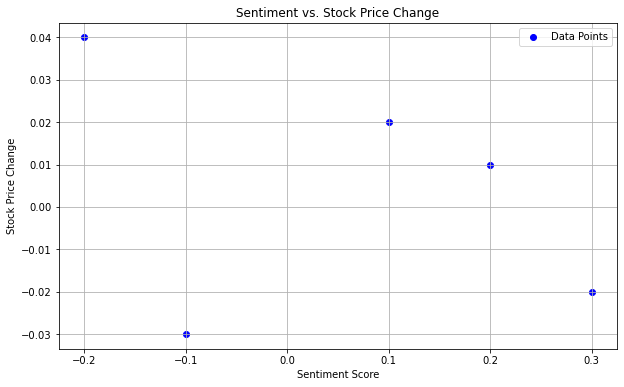

In [96]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data (replace with your data)
data = {
    'Date': ['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05'],
    'Sentiment_Score': [0.1, 0.2, -0.1, -0.2, 0.3],
    'Stock_Price_Change': [0.02, 0.01, -0.03, 0.04, -0.02]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Create a scatter plot to visualize sentiment vs. stock price change
plt.figure(figsize=(10, 6))
plt.scatter(df['Sentiment_Score'], df['Stock_Price_Change'], c='blue', label='Data Points')
plt.xlabel('Sentiment Score')
plt.ylabel('Stock Price Change')
plt.title('Sentiment vs. Stock Price Change')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


In [ ]:
may 4 2023